In [86]:
import warnings
warnings. filterwarnings("ignore")


In [87]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math 
import shutil
import glob

In [88]:
#count the number of images 


Root_dir = "Brain Tumor Data Set"
number_of_images = {}

for dir in os.listdir(Root_dir):
  number_of_images[dir] = len(os.listdir(os.path.join(Root_dir,dir)))

In [89]:
number_of_images.items()

dict_items([('Brain Tumor', 8), ('Healthy', 7)])

spliting the data
70% for train data
15% testing 
15% validation

In [90]:
def datafolder(path,split):
    
    # Create the train_folder if it doesn't exist
    if not os.path.exists("./"+path):
        os.makedirs("./"+path)
        
        for dir in os.listdir(Root_dir):
            dir_path = os.path.join(Root_dir, dir)
            if os.path.isdir(dir_path):  # Ensure it's a directory
                os.makedirs(os.path.join("./"+path+"/", dir))

                # Select random images to copy
                selected_images = np.random.choice(
                    a=os.listdir(dir_path),
                    size=math.floor(split * number_of_images.get(dir, 0) - 2), 
                    replace=False
                )
                
                for img in selected_images:
                    src = os.path.join(dir_path, img)  # Correct path to the image
                    dst = os.path.join("./"+path, dir, img)  # Destination path for the image
                    
                    shutil.copy(src, dst)  # Copy the image
                    os.remove(src)  # Remove the image from the original folder

    else:
        print("Folder exists")


        



In [91]:
datafolder("train_folder",0.7)

Folder exists


In [92]:
datafolder("test_folder",0.15)

Folder exists


In [93]:
datafolder("val_folder",0.15)

Folder exists


Model Building

In [94]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [95]:
model = Sequential()


model.add(Conv2D(filters = 16,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))

model.add(Conv2D( filters=36,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D( filters=64,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D( filters=128,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(units=1, activation='sigmoid'))

In [96]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

Preparing our data using data generator

In [98]:
def preprocessingImages(path):
    image_data=ImageDataGenerator(zoom_range= 0.2,
                                  shear_range=0.2,
                                  rescale=1/255,
                                  horizontal_flip=True)
    image=image_data.flow_from_directory(directory=path,
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='binary')
    return image

In [99]:

train_data=preprocessingImages("train_folder")

Found 3215 images belonging to 2 classes.


In [100]:
def preprocessingImages2(path):
    image_data=ImageDataGenerator(rescale=1/255,)
    image=image_data.flow_from_directory(directory=path,
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='binary')
    return image

In [101]:
test_data=preprocessingImages2("test_folder")

Found 685 images belonging to 2 classes.


In [102]:
val_data=preprocessingImages2("val_folder")

Found 685 images belonging to 2 classes.


#early stopping and model checkpoints

In [103]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy',
                                min_delta=0.01, 
                                patience= 5, 
                                
                                verbose=1,
                                mode ='auto')

model_checkpoint = ModelCheckpoint(monitor='val_accuracy',
                                   filepath="./bestmodel.keras",
                                   verbose=1,
                                   save_best_only= True,
                                   mode ='auto')

call_back=[early_stopping, model_checkpoint]

Model Training

In [104]:
history=model.fit(train_data,
                            steps_per_epoch=8,
                            epochs=30,
                            verbose=1,
                            validation_data=val_data,
                            validation_steps=16,
                            callbacks=call_back)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5241 - loss: 0.7191
Epoch 1: val_accuracy improved from -inf to 0.63867, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.5266 - loss: 0.7190 - val_accuracy: 0.6387 - val_loss: 0.6651
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6249 - loss: 0.6698
Epoch 2: val_accuracy did not improve from 0.63867
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6218 - loss: 0.6705 - val_accuracy: 0.6185 - val_loss: 0.6132
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6388 - loss: 0.6284
Epoch 3: val_accuracy improved from 0.63867 to 0.74414, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.6416 - loss: 0.6279 - val_accuracy: 0.7441 - val_loss: 0.5818
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6406 - loss: 0.6466 
Epoch 4: val_accuracy did not improve from 0.74414
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6396 -

Model Graphical Interpritation 

In [105]:
h=history.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

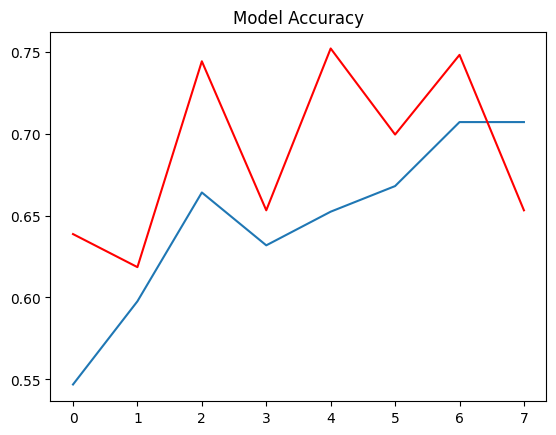

In [106]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')

plt.title('Model Accuracy')


plt.show()

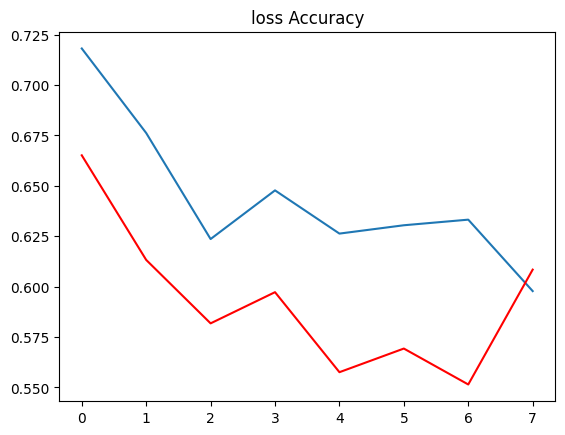

In [107]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')

plt.title('loss Accuracy')


plt.show()

model accuracy 

In [108]:
from keras.models import load_model

best_model=load_model('bestmodel.keras')

In [109]:
accuracy= model.evaluate(test_data)[1]

print(f"The model accuracy is {accuracy*100}%")

22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 292ms/step - accuracy: 0.7304 - loss: 0.5613
The model accuracy is 72.40875959396362%


In [113]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# Load and preprocess the image
def image_check(image_path):
    img = load_img(image_path, target_size=(224, 224))
    input_arr = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]

    plt.imshow(img)
    plt.title("Input Image")
    plt.axis("off")
    plt.show()

    # Expand dimensions to add batch size
    input_arr = np.expand_dims(input_arr, axis=0)

    # Predict the probability of the tumor
    pred_prob = model.predict(input_arr)[0][0]  # Single value from sigmoid

    if pred_prob >= 0.5:
        print(f"The image is healthy .")
    else:
        print(f"The image contains tumor .")


 

In [114]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

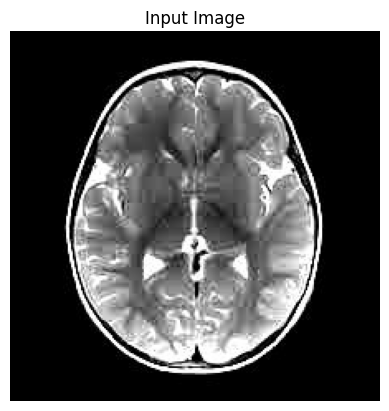

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
The image is healthy .


In [119]:
image_check(r"Z_TransferDataSet\Healthy\Not Cancer  (1193).jpg")


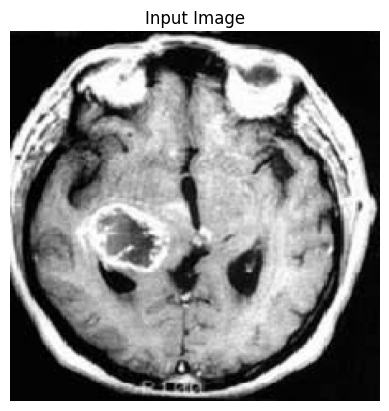

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The image contains tumor .


In [116]:
image_check(r"Z_TransferDataSet\Brain Tumor\Cancer (849).jpg")